<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/Sim_2_Homework_3_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIMULATION 2
##HOMEWORK 3: Experimental Design and Inventory Simulation
##Answers

Due: In class on Friday, June 16, 2023

Name: Your name here

Overall score: 30 / 30 pts

1)	[16 points] In class, I introduced an (s, Q) inventory simulation. Below, I have created a finished version of the simulation with the following characteristics:

• Demand occurs randomly with an exponential distribution with mean 0.1 months.\
• The quantity demanded is 1, 2, 3, or 4 with probabilities 1/6, 1/3, 1/3, and 1/6 respectively.\
• Holding cost is \$1/per item/month \
• Shortage cost is \$5/per item/month\
• Order cost is $32 per order. I neglected to also include a\$3 per item delivery cost.

In this initial version, inventory is continuously reviewed and there is no leadtime between ordering and recieving a delivery.  This means that any time the demand reduces the inventory below the reorder point, s, an order is made and the inventory is instantly increased to s + Q.

The simulation is run for 10 years. Because of the random demand, 30 replications are performed for each case.  The cases are defined for various values of s and Q.  For each, there is a minimum, maximum, and increment.  So, for example, s_min = 0, s_max = 10, s_inc = 5, Q_min = 10, Q_max = 20, and Q_inc = 10 will create the following 6 cases for (s, Q): \

(0, 10), (0, 20), (5, 10), (5, 20), (10, 10), (10, 20)

After the simulation itself, I have included code for a contour plot that helps in visualizing the result.

a) Run four cases with the combinations of s = -50 and 50, and Q = 10 and 110. From these four cases, what values of s and Q appear to minimize cost? (2 points)


-50 10 369.26025251174514
-50 110 152.49572307127528
50 10 204.33448949005594
50 110 187.22188788622455


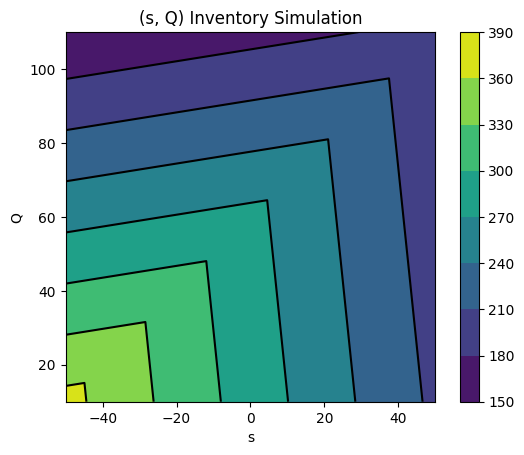

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def demand_quantity():
	#Determine the demand
	prob = np.random.uniform(0, 1.0)
	if prob < 1/6:
		return 1
	elif prob < 0.5:
		return 2
	elif prob < 5/6:
		return 3
	else:
		return 4

def demand_event(s, Q, demand):
	global inventory
	global cost
	global order_cost
	global per_item_cost
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	#Determine if an order is needed
	if inventory - demand <= s:
		shipped = s + Q - inventory + demand
		cost += order_cost + shipped * per_item_cost
		inventory = s + Q
	else:
		inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_cost():
	global inventory
	global holding_cost
	global shortage_cost
	global cost
	global last_costing
	global sim_time
	if inventory > 0:
		cost += inventory * (sim_time - last_costing) * holding_cost
	else:
		cost -= inventory * (sim_time - last_costing) * shortage_cost
	last_costing = sim_time

def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

#Inventory system paramenters
s_min = -50
s_max = 50
s_inc = 100
s_list = []
Q_min = 10
Q_max = 110
Q_inc = 100
Q_list = []
holding_cost = 1
shortage_cost = 5
order_cost = 32
per_item_cost = 3

#events
class event:
  def __init__(self, sim_time, event_type, quantity):
    self.sim_time = sim_time
    self.event_type = event_type
    self.quantity = quantity

aver_costs = []

for s in range(s_min, s_max+1, s_inc):
	for Q in range(Q_min, Q_max+1, Q_inc):
		s_list.append(s)
		Q_list.append(Q)
		costs = []
		for rep in range(30):
			costs.append(sQ_inventory_system(s, Q))
		aver_costs.append(np.average(costs))
		print(s, Q, np.average(costs))

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(s_list, Q_list, aver_costs)
fig1.colorbar(tcf)
ax1.tricontour(s_list, Q_list, aver_costs, colors='k')
ax1.set_xlabel('s')
ax1.set_ylabel('Q')
ax1.set_title('(s, Q) Inventory Simulation');

The minimum cost is at s = -50, Q = 110 for a cost of $152.23.

b) We are now going to use experimental design to see if we can find an optimum.  Of course, we could run an exhaustive set of cases, but recall that the whole purpose for experimental design is to gather information with the least number of runs as possible (usually due to severe resource constraints.)

Remembering that the low value for each factor are represented by a minus sign and the high value by a plus sign, print out the average responses from a) and add them to this table (double clicking the text will open up the text so you can add to the table.) [2 points]


Design Point|s|Q|sxQ|Average Response                       
------------|-|-|---|--------
1           |–|–|+  |\$369.26           
2           |+|–|–  |\$204.33           
3           |–|+|–  |\$152.50       
4           |+|+|+  |\$187.22       

c) Using the negative and positive signs in each of the columns of the table in b) calculate the effect of s, the effect of Q, and the effect of s, Q.  (For example, the effect of s will be (-response1 + response2 - response 3 + response 4)/2.). What do these effects indicate? [2 points]

Effect of s = -65.105, effect of Q is -116.935, effect of sQ is 99.825. Increasing s and Q will both decrease cost although increasing Q is more dominate than increasing.  The sQ effect indicates that cost will go down moving sQ together, in this case, increasing s and Q together.

d) It may be tempting to assume the best cost is going to be at the values of s and Q you identified in a) - c).  However, we would like to also investigate the possibility that the surface is curved and reaches a minimum somewhere in the middle of figure a) above. So, let's first move in the direction of where we think the minimum will be found, but not all the way.  Let s take the values of -25 and 0 while Q takes the values 60 and 85. Repeat parts a) - c) and comment on what you observe. [6 points]

-25 60 124.11758144579176
-25 85 123.52175932202387
0 60 118.82083969241934
0 85 126.19836196907266


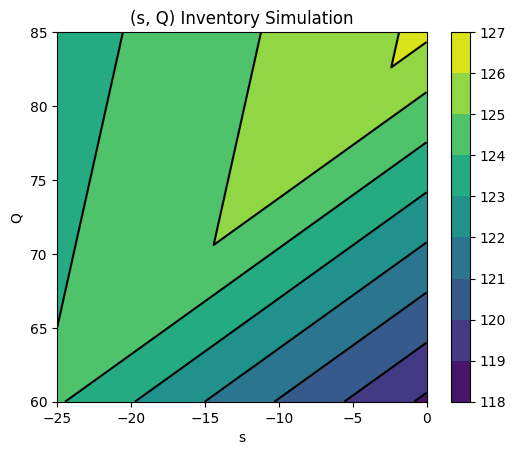

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def demand_quantity():
	#Determine the demand
	prob = np.random.uniform(0, 1.0)
	if prob < 1/6:
		return 1
	elif prob < 0.5:
		return 2
	elif prob < 5/6:
		return 3
	else:
		return 4

def demand_event(s, Q, demand):
	global inventory
	global cost
	global order_cost
	global per_item_cost
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	#Determine if an order is needed
	if inventory - demand <= s:
		shipped = s + Q - inventory + demand
		cost += order_cost + shipped * per_item_cost
		inventory = s + Q
	else:
		inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_cost():
	global inventory
	global holding_cost
	global shortage_cost
	global cost
	global last_costing
	global sim_time
	if inventory > 0:
		cost += inventory * (sim_time - last_costing) * holding_cost
	else:
		cost -= inventory * (sim_time - last_costing) * shortage_cost
	last_costing = sim_time

def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

#Inventory system paramenters
s_min = -25
s_max = 0
s_inc = 25
s_list = []
Q_min = 60
Q_max = 85
Q_inc = 25
Q_list = []
holding_cost = 1
shortage_cost = 5
order_cost = 32
per_item_cost = 3

#events
class event:
  def __init__(self, sim_time, event_type, quantity):
    self.sim_time = sim_time
    self.event_type = event_type
    self.quantity = quantity

aver_costs = []

for s in range(s_min, s_max+1, s_inc):
	for Q in range(Q_min, Q_max+1, Q_inc):
		s_list.append(s)
		Q_list.append(Q)
		costs = []
		for rep in range(30):
			costs.append(sQ_inventory_system(s, Q))
		aver_costs.append(np.average(costs))
		print(s, Q, np.average(costs))

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(s_list, Q_list, aver_costs)
fig1.colorbar(tcf)
ax1.tricontour(s_list, Q_list, aver_costs, colors='k')
ax1.set_xlabel('s')
ax1.set_ylabel('Q')
ax1.set_title('(s, Q) Inventory Simulation');

Fill out table:

Design Point|s|Q|sxQ|Average Response                       
------------|-|-|---|--------
1           |–|–|+  |\$124.12           
2           |+|–|–  |\$118.82               
3           |–|+|–  |\$123.52         
4           |+|+|+  |\$126.20

Effects of s: -1.31,
Effects of Q: 3.39,
Effects of s,Q: 3.99

Comments: Increasing s decreases costs.  In fact the effect is mixed - for high Q, decreasing s is preferred but for low Q increasing s in preferred. Decreasing Q has a stronger effect.  The interaction effect suggests the s and Q should move in opposite directions.  So, the low of Q and the high value of s will reduce costs.

e) With only 8 design points, we have begun to narrow down where the minimum cost might be.  While the small number of design points is a benefit, it is also a fairly severe limitation.  That's why this is only a very rudimentary beginning.  There are much better experimental designs.  Primarily, these rely on not just sampling the corner points, but including interior points as well. The next simplest is to include nine design points with three values for each factor. Rerun the code with s = -50, 0, 50 and Q = 10, 60, 110.  Provide the contour plot. (1 point)

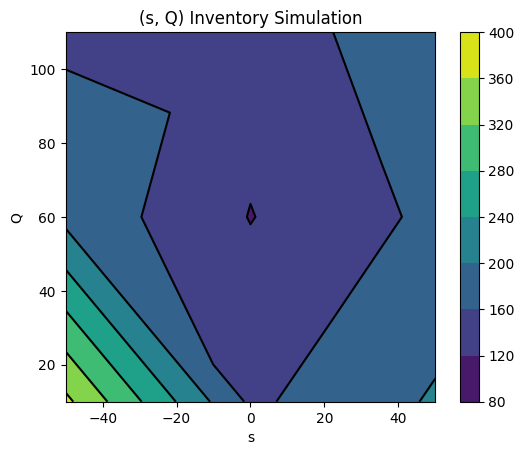

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def demand_quantity():
	#Determine the demand
	prob = np.random.uniform(0, 1.0)
	if prob < 1/6:
		return 1
	elif prob < 0.5:
		return 2
	elif prob < 5/6:
		return 3
	else:
		return 4

def demand_event(s, Q, demand):
	global inventory
	global cost
	global order_cost
	global per_item_cost
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	#Determine if an order is needed
	if inventory - demand <= s:
		shipped = s + Q - inventory + demand
		cost += order_cost + shipped * per_item_cost
		inventory = s + Q
	else:
		inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_cost():
	global inventory
	global holding_cost
	global shortage_cost
	global cost
	global last_costing
	global sim_time
	if inventory > 0:
		cost += inventory * (sim_time - last_costing) * holding_cost
	else:
		cost -= inventory * (sim_time - last_costing) * shortage_cost
	last_costing = sim_time

def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

#Inventory system paramenters
s_min = -50
s_max = 50
s_inc = 50
s_list = []
Q_min = 10
Q_max = 110
Q_inc = 50
Q_list = []
holding_cost = 1
shortage_cost = 5
order_cost = 32
per_item_cost = 3

#events
class event:
  def __init__(self, sim_time, event_type, quantity):
    self.sim_time = sim_time
    self.event_type = event_type
    self.quantity = quantity

aver_costs = []

for s in range(s_min, s_max+1, s_inc):
	for Q in range(Q_min, Q_max+1, Q_inc):
		s_list.append(s)
		Q_list.append(Q)
		costs = []
		for rep in range(30):
			costs.append(sQ_inventory_system(s, Q))
		aver_costs.append(np.average(costs))

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(s_list, Q_list, aver_costs)
fig1.colorbar(tcf)
ax1.tricontour(s_list, Q_list, aver_costs, colors='k')
ax1.set_xlabel('s')
ax1.set_ylabel('Q')
ax1.set_title('(s, Q) Inventory Simulation');

f) Finally, try 25 design points with s = -50, -25, 0, 25, 50 and Q = 10, 35, 60, 85, and 110. (1 point)

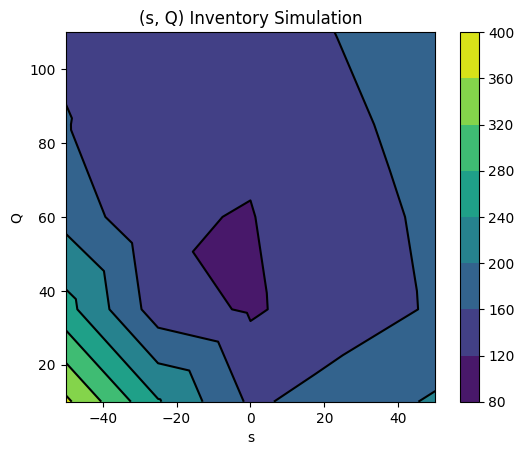

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def demand_quantity():
	#Determine the demand
	prob = np.random.uniform(0, 1.0)
	if prob < 1/6:
		return 1
	elif prob < 0.5:
		return 2
	elif prob < 5/6:
		return 3
	else:
		return 4

def demand_event(s, Q, demand):
	global inventory
	global cost
	global order_cost
	global per_item_cost
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	#Determine if an order is needed
	if inventory - demand <= s:
		shipped = s + Q - inventory + demand
		cost += order_cost + shipped * per_item_cost
		inventory = s + Q
	else:
		inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_cost():
	global inventory
	global holding_cost
	global shortage_cost
	global cost
	global last_costing
	global sim_time
	if inventory > 0:
		cost += inventory * (sim_time - last_costing) * holding_cost
	else:
		cost -= inventory * (sim_time - last_costing) * shortage_cost
	last_costing = sim_time

def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

#Inventory system paramenters
s_min = -50
s_max = 50
s_inc = 25
s_list = []
Q_min = 10
Q_max = 110
Q_inc = 25
Q_list = []
holding_cost = 1
shortage_cost = 5
order_cost = 32
per_item_cost = 3

#events
class event:
  def __init__(self, sim_time, event_type, quantity):
    self.sim_time = sim_time
    self.event_type = event_type
    self.quantity = quantity

aver_costs = []

for s in range(s_min, s_max+1, s_inc):
	for Q in range(Q_min, Q_max+1, Q_inc):
		s_list.append(s)
		Q_list.append(Q)
		costs = []
		for rep in range(30):
			costs.append(sQ_inventory_system(s, Q))
		aver_costs.append(np.average(costs))

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(s_list, Q_list, aver_costs)
fig1.colorbar(tcf)
ax1.tricontour(s_list, Q_list, aver_costs, colors='k')
ax1.set_xlabel('s')
ax1.set_ylabel('Q')
ax1.set_title('(s, Q) Inventory Simulation');

g) Comment on what you observe about the emerging mininum. (2 points)

The optimum appears to be somewhere between s = -25 and s = 0, and Q = 35 and Q = 60.  To narrow this down further, we could focus within these bounds.

In conclusion, computational experiments sometimes need experimental designs to extract desired results from an acceptable number of runs.  What I've been able to show you is just the begin.  Some wonderful work in this area has been conducted at the Naval Postgraduage School SEED Center (check out https://nps.edu/web/seed/papers-presentations).

2) [14 points] The inventory simulation above has two assumption that we would like to remove.  First, it has instantaneous delivery of orders (no lead-time). Second, it has continuous inventory review (knowing exactly when the demand drops inventory below the reorder point.) We will assume that lead-time is a uniform random variable between 1/2 and 1 month. For this, we will need a Delivery event and a delivery_event function. For inventory review, we will assume that it occurs regular monthly intervals.  And, we will need an "Inventory Review" event and an inventory_review_event function.


a) Let's start with the delivery_event function.  Complete the function below.  It should:\
• Calculate inventory cost using the function inventory_cost that is already in the code and \
• Add the quantity delivered to the inventory. \
(2 points)

In [ ]:
def delivery_event(quantity):
  global inventory
  inventory_cost()
  inventory += quantity

b) Now, let's add the inventory_review_event.  We will also need to modify the demand_event.  Do the following to the code below: \
• Remove the code from the demand_event that determines if an order needs to be placed and move it to the inventory_review_event. This code will need a three changes: \
>First, remove "demand" since this code is no longer in the demand_event.

>Second, for better meaning, change "shipped" to "order_quantity".

>Third, remove the change in inventory.  This will occur when the order is delivered.

(Make sure you keep in demand_event the code for decrementing the demand from the inventory!)\
• Schedule a Delivery event every time an order is placed. Delay the delivery by a uniform(0.5, 1.0) random variable. Include the order_quantity as the "quantity" element of the event. \
• At the end of the inventory_review_event, schedule another "Inventory Review" event 1 period later. \
• Finally, remove the unnecessary globl statements from demend_event and add global statements for variables you need on the inventory_review_event. \
(4 points)

In [ ]:
def demand_event(s, Q, demand):
	global inventory
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_review_event():
	global inventory
	global cost
	global order_cost
	#Determine if an order is needed
	if inventory <= s:
		order_quantity = s + Q - inventory
		cost += order_cost + order_quantity * per_item_cost
		event_queue.append(event(sim_time + np.random.uniform(0.5, 1.0), "Delivery", order_quantity))
	event_queue.append(event(sim_time + 1.0,"Inventory Review",0))

c) Finally, change the sQ_inventory_system function as follows:\
• As part of the initialization, schedule the first "Inventory Review" event at time 1.0\
• Call the delivery_event when a Delivery event reaches the top of the event queue. \
• Call the inventory_review_event when an "Inventory Review" event reaches the top of the event queue.\
(3 points)

In [ ]:
def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))
	event_queue.append(event(1.0,"Inventory Review",0))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		elif event_queue[0].event_type == "Delivery":
				delivery_event(event_queue[0].quantity)
		elif event_queue[0].event_type == "Inventory Review":
				inventory_review_event()
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

d) Put your new code together and run with \
s_min = 0\
s_max = 100\
s_inc = 5\
Q_min = 10\
Q_max = 110\
Q_inc = 5\
(5 points)

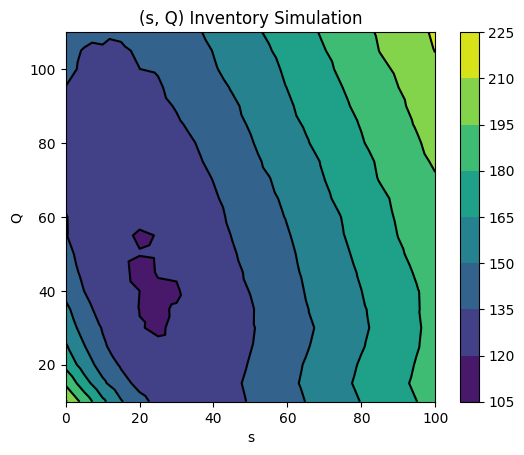

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def demand_quantity():
	#Determine the demand
	prob = np.random.uniform(0, 1.0)
	if prob < 1/6:
		return 1
	elif prob < 0.5:
		return 2
	elif prob < 5/6:
		return 3
	else:
		return 4

def delivery_event(quantity):
	global inventory
	inventory_cost()
	inventory += quantity

def demand_event(s, Q, demand):
	global inventory
	global event_queue
	global sim_time
  #Calculating the inventory/shortage cost
	inventory_cost()
	inventory -= demand
	#Schedule next demand
	event_queue.append(event(sim_time + np.random.exponential(0.1), "Demand", demand_quantity()))

def inventory_review_event():
	global inventory
	global cost
	global order_cost
	#Determine if an order is needed
	if inventory <= s:
		order_quantity = s + Q - inventory
		cost += order_cost + order_quantity * per_item_cost
		event_queue.append(event(sim_time + np.random.uniform(0.5, 1.0), "Delivery", order_quantity))
	event_queue.append(event(sim_time + 1.0,"Inventory Review",0))

def inventory_cost():
	global inventory
	global holding_cost
	global shortage_cost
	global cost
	global last_costing
	global sim_time
	if inventory > 0:
		cost += inventory * (sim_time - last_costing) * holding_cost
	else:
		cost -= inventory * (sim_time - last_costing) * shortage_cost
	last_costing = sim_time

def sQ_inventory_system(s, Q):
	global inventory
	global cost
	global last_costing
	global orders
	global order_cost
	global event_queue
	global sim_time
	global max_sim_time

	inventory = s + Q
	cost = 0
	last_costing = 0
	orders = 0

	event_queue = []
	event_queue.append(event(np.random.exponential(0.1), "Demand", demand_quantity()))
	event_queue.append(event(1.0,"Inventory Review",0))

	#timing
	sim_time = 0
	max_sim_time = 120

	while sim_time <= max_sim_time:
		sim_time = event_queue[0].sim_time
		if event_queue[0].event_type == "Demand":
				demand_event(s, Q, event_queue[0].quantity)
		elif event_queue[0].event_type == "Delivery":
				delivery_event(event_queue[0].quantity)
		elif event_queue[0].event_type == "Inventory Review":
				inventory_review_event()
		del event_queue[0]
		event_queue.sort(key = lambda x : x.sim_time)
	return cost/max_sim_time

#Inventory system paramenters
s_min = 0
s_max = 100
s_inc = 5
s_list = []
Q_min = 10
Q_max = 110
Q_inc = 5
Q_list = []
holding_cost = 1
shortage_cost = 5
order_cost = 32
per_item_cost = 3

#events
class event:
  def __init__(self, sim_time, event_type, quantity):
    self.sim_time = sim_time
    self.event_type = event_type
    self.quantity = quantity

aver_costs = []

for s in range(s_min, s_max+1, s_inc):
	for Q in range(Q_min, Q_max+1, Q_inc):
		s_list.append(s)
		Q_list.append(Q)
		costs = []
		for rep in range(30):
			costs.append(sQ_inventory_system(s, Q))
		aver_costs.append(np.average(costs))

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(s_list, Q_list, aver_costs)
fig1.colorbar(tcf)
ax1.tricontour(s_list, Q_list, aver_costs, colors='k')
ax1.set_xlabel('s')
ax1.set_ylabel('Q')
ax1.set_title('(s, Q) Inventory Simulation');